In [90]:
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [91]:
file_path = "../data/BTCUSDT-binance-spot-1d.csv"
df = pd.read_csv(file_path)
df.head()

,timestamp,open,high,low,close,volume
0,2017-08-17,4261.48,4485.39,4200.74,4285.08,795.150377
1,2017-08-18,4285.08,4371.52,3938.77,4108.37,1199.888264
2,2017-08-19,4108.37,4184.69,3850.00,4139.98,381.309763
3,2017-08-20,4120.98,4211.08,4032.62,4086.29,467.083022
4,2017-08-21,4069.13,4119.62,3911.79,4016.00,691.743060


In [92]:
df.describe()

,open,high,low,close,volume
count,2783.000000,2783.000000,2783.000000,2783.000000,2783.000000
mean,29126.076101,29818.035602,28379.252619,29154.086820,66825.282084
std,24673.445255,25191.557459,24119.866955,24689.349345,79210.865993
min,3188.010000,3276.500000,2817.000000,3189.020000,228.108068
25%,8695.420000,8904.160000,8403.950000,8700.855000,27562.526052
50%,21195.600000,21684.870000,20736.720000,21237.690000,43000.432560
75%,43685.535000,44377.260000,42557.730000,43707.880000,70098.076238
max,106143.820000,109588.000000,105321.490000,106143.820000,760705.362783


In [93]:
# Check if any NaN exists
has_nan = df.isna().any().any()
print("Does the DataFrame contain any NaN?:", has_nan)

Does the DataFrame contain any NaN?: False


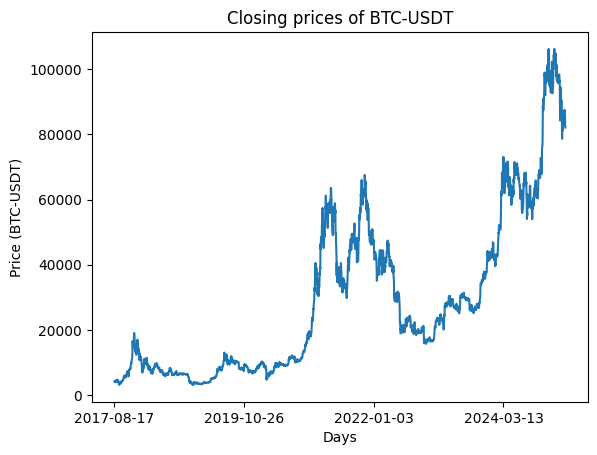

In [94]:
plt.plot(df['timestamp'],df['close'])
plt.xlabel('Days')
plt.ylabel('Price (BTC-USDT)')
plt.title('Closing prices of BTC-USDT')

# Reduce the number of ticks
from matplotlib.ticker import MaxNLocator
plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=5))  # Show ~5 ticks

In [95]:
df['log return'] = np.log(df['close'] / df['close'].shift(1))
df['price change intraday'] = df['close']/df['open'] - 1
df['price change overnight'] = df['open']/df['close'].shift(1) - 1

Text(0.5, 1.0, 'Distribution of Log Returns (Closing Price)')

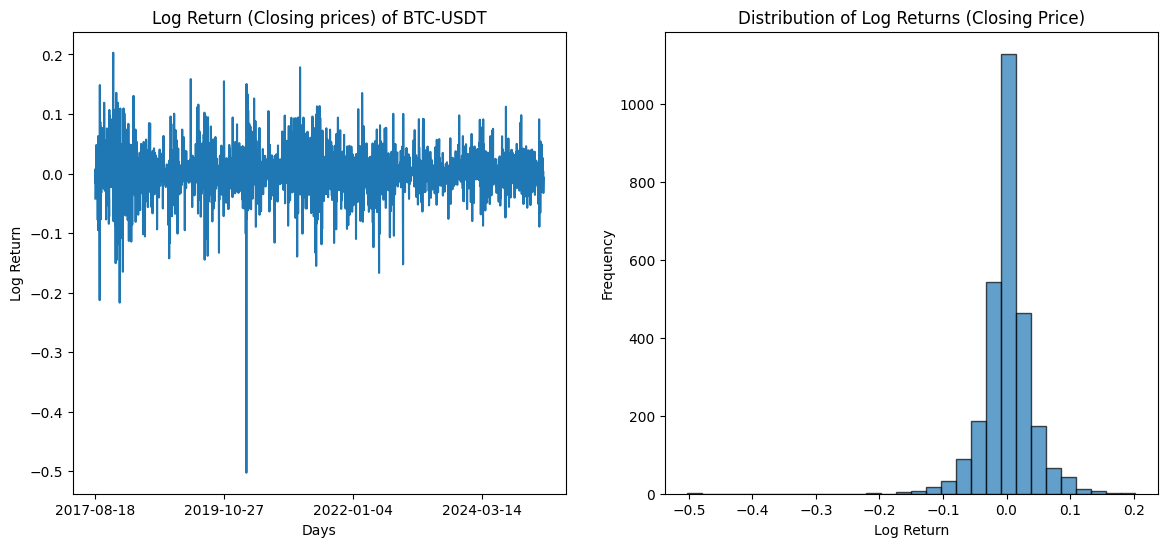

In [96]:
df_forcleaning = df.dropna()

fig, axs = plt.subplots(1,2,figsize=(14, 6))
axs[0].plot(df_forcleaning['timestamp'],df_forcleaning['log return'])

axs[0].set_xlabel('Days')
axs[0].set_ylabel('Log Return')
axs[0].set_title('Log Return (Closing prices) of BTC-USDT')
axs[0].xaxis.set_major_locator(MaxNLocator(nbins=5))  # Show ~5 ticks

# Plot histogram with KDE
axs[1].hist(df_forcleaning['log return'], bins=30, edgecolor='black', alpha=0.7)

# Add labels and title
axs[1].set_xlabel('Log Return')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Distribution of Log Returns (Closing Price)')

Text(0.5, 1.0, 'Distribution of price change within a day (Open to Close Price)')

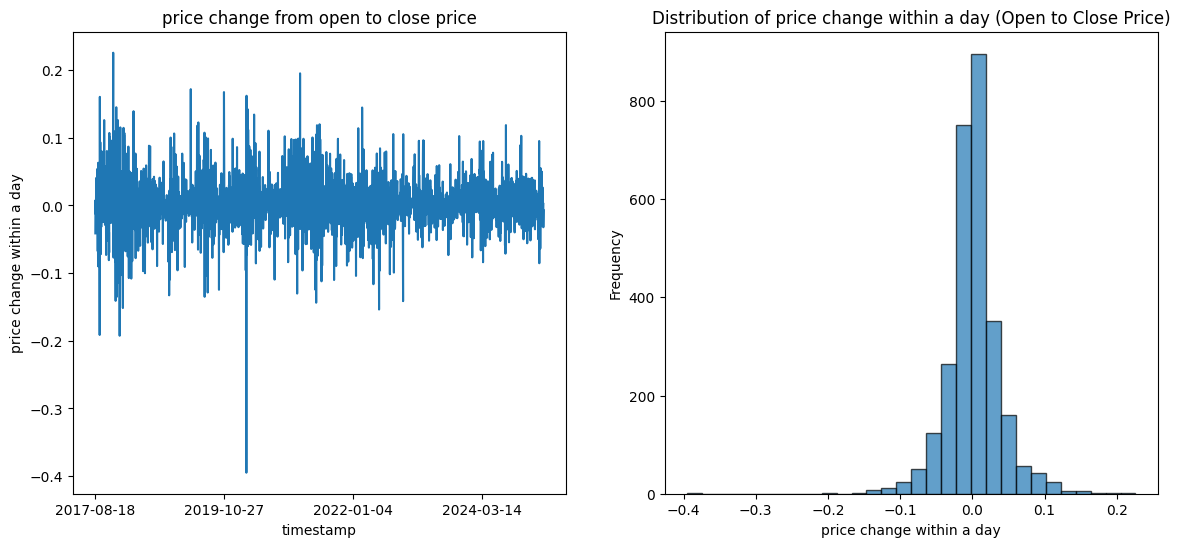

In [97]:
fig, axs = plt.subplots(1,2,figsize=(14,6))
axs[0].plot(df_forcleaning['timestamp'],df_forcleaning['price change intraday'])
axs[0].set_xlabel("timestamp")
axs[0].set_ylabel("price change within a day")
axs[0].set_title("price change from open to close price")
axs[0].xaxis.set_major_locator(MaxNLocator(nbins=5))  # Show ~5 ticks

# Plot histogram with KDE
axs[1].hist(df_forcleaning['price change intraday'], bins=30, edgecolor='black', alpha=0.7)

# Add labels and title
axs[1].set_xlabel('price change within a day')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Distribution of price change within a day (Open to Close Price)')

Text(0.5, 1.0, 'Distribution of price change overnight (Close to Next day Open Price)')

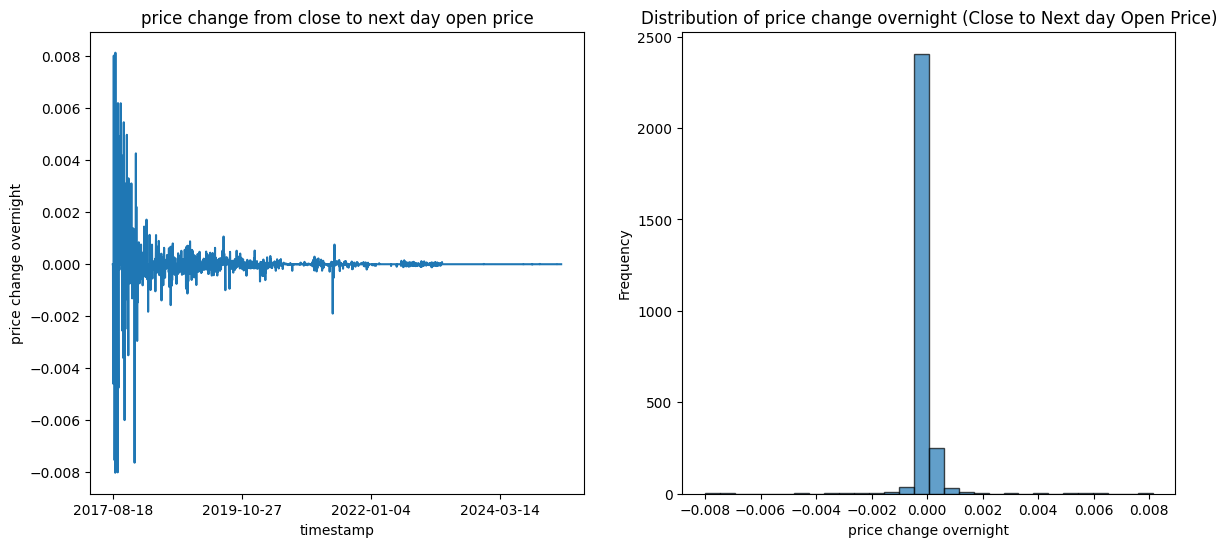

In [98]:
fig, axs = plt.subplots(1,2,figsize=(14,6))
axs[0].plot(df_forcleaning['timestamp'],df_forcleaning['price change overnight'])
axs[0].set_xlabel("timestamp")
axs[0].set_ylabel("price change overnight")
axs[0].set_title("price change from close to next day open price")
axs[0].xaxis.set_major_locator(MaxNLocator(nbins=5))  # Show ~5 ticks

# Plot histogram with KDE
axs[1].hist(df_forcleaning['price change overnight'], bins=30, edgecolor='black', alpha=0.7)

# Add labels and title
axs[1].set_xlabel('price change overnight')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Distribution of price change overnight (Close to Next day Open Price)')

In [99]:
df_forcleaning.sort_values('log return').head()

,timestamp,open,high,low,close,volume,log return,price change intraday,price change overnight
938,2020-03-12,7934.58,7966.17,4410.00,4800.00,261505.608653,-0.502607,-0.395053,0.000008
152,2018-01-16,13500.00,13542.93,9035.00,10900.00,63401.169175,-0.216880,-0.192593,-0.002949
28,2017-09-14,3944.00,3993.00,3165.13,3189.02,1665.021543,-0.212657,-0.191425,-0.000175
1761,2022-06-13,26574.53,26895.84,21925.77,22487.41,254611.034966,-0.166998,-0.153798,0.000000
172,2018-02-05,8179.99,8382.80,6625.00,6939.99,63403.182579,-0.164980,-0.151589,-0.000589


In [100]:
df_forcleaning.sort_values('log return').tail()

,timestamp,open,high,low,close,volume,log return,price change intraday,price change overnight
939,2020-03-13,4800.01,5955.00,3782.13,5578.60,402201.673764,0.150322,0.162206,0.000002
799,2019-10-25,7412.41,8799.00,7361.00,8655.02,90748.218174,0.154984,0.167639,0.000000
593,2019-04-02,4144.54,4897.99,4140.54,4857.29,105383.639263,0.158684,0.171973,-0.000005
1271,2021-02-08,38795.69,46794.45,37988.89,46374.87,138597.536914,0.178449,0.195361,0.000000
112,2017-12-07,13541.01,16649.96,13050.00,16599.00,7487.065695,0.202952,0.225832,-0.000667


In [101]:
df_forcleaning.sort_values('price change intraday').head()

,timestamp,open,high,low,close,volume,log return,price change intraday,price change overnight
938,2020-03-12,7934.58,7966.17,4410.00,4800.00,261505.608653,-0.502607,-0.395053,0.000008
152,2018-01-16,13500.00,13542.93,9035.00,10900.00,63401.169175,-0.216880,-0.192593,-0.002949
28,2017-09-14,3944.00,3993.00,3165.13,3189.02,1665.021543,-0.212657,-0.191425,-0.000175
1761,2022-06-13,26574.53,26895.84,21925.77,22487.41,254611.034966,-0.166998,-0.153798,0.000000
172,2018-02-05,8179.99,8382.80,6625.00,6939.99,63403.182579,-0.164980,-0.151589,-0.000589


In [102]:
df_forcleaning.sort_values('price change intraday').tail()

,timestamp,open,high,low,close,volume,log return,price change intraday,price change overnight
939,2020-03-13,4800.01,5955.00,3782.13,5578.60,402201.673764,0.150322,0.162206,0.000002
799,2019-10-25,7412.41,8799.00,7361.00,8655.02,90748.218174,0.154984,0.167639,0.000000
593,2019-04-02,4144.54,4897.99,4140.54,4857.29,105383.639263,0.158684,0.171973,-0.000005
1271,2021-02-08,38795.69,46794.45,37988.89,46374.87,138597.536914,0.178449,0.195361,0.000000
112,2017-12-07,13541.01,16649.96,13050.00,16599.00,7487.065695,0.202952,0.225832,-0.000667


In [103]:
df_forcleaning.sort_values('price change overnight').head()

,timestamp,open,high,low,close,volume,log return,price change intraday,price change overnight
16,2017-09-02,4796.16,4939.19,4286.87,4472.14,929.148595,-0.077995,-0.067558,-0.008015
31,2017-09-17,3685.23,3748.21,3499.02,3699.99,682.171210,-0.004035,0.004005,-0.008000
136,2017-12-31,12345.10,14050.11,12149.98,13716.36,11768.989718,0.097671,0.111077,-0.007629
12,2017-08-29,4353.65,4625.85,4313.55,4587.48,603.545028,0.044756,0.053709,-0.007532
15,2017-09-01,4689.89,4885.55,4654.88,4834.91,560.666366,0.023018,0.030922,-0.007408


In [104]:
df_forcleaning.sort_values('price change overnight').tail()

,timestamp,open,high,low,close,volume,log return,price change intraday,price change overnight
25,2017-09-11,4153.62,4334.43,4098.91,4208.47,699.989065,0.018732,0.013205,0.005629
50,2017-10-06,4318.99,4417.00,4292.00,4369.00,506.529176,0.017681,0.011579,0.006188
33,2017-09-19,4060.00,4089.97,3830.91,3910.04,902.332129,-0.031461,-0.036936,0.006193
7,2017-08-24,4147.00,4371.68,4085.01,4316.01,787.418753,0.047933,0.040755,0.008019
17,2017-09-03,4508.50,4714.76,4298.33,4509.08,691.216198,0.008226,0.000129,0.008130


In [123]:
df_forcleaning[(df_forcleaning['timestamp'] >= '2020-03-11') & (df_forcleaning['timestamp'] < '2020-03-15')]

,timestamp,open,high,low,close,volume,log return,price change intraday,price change overnight
937,2020-03-11,7894.57,7980.00,7590.00,7934.52,79942.411172,0.005049,0.005060,0.000001
938,2020-03-12,7934.58,7966.17,4410.00,4800.00,261505.608653,-0.502607,-0.395053,0.000008
939,2020-03-13,4800.01,5955.00,3782.13,5578.60,402201.673764,0.150322,0.162206,0.000002
940,2020-03-14,5576.05,5640.52,5055.13,5172.06,136910.135974,-0.075667,-0.072451,-0.000457


In [124]:
df_forcleaning[(df_forcleaning['timestamp'] >= '2017-12-06') & (df_forcleaning['timestamp'] < '2017-12-09')]

,timestamp,open,high,low,close,volume,log return,price change intraday,price change overnight
111,2017-12-06,11699.99,13615.23,11665.58,13550.05,6707.946319,0.146802,0.158125,0.000000
112,2017-12-07,13541.01,16649.96,13050.00,16599.00,7487.065695,0.202952,0.225832,-0.000667
113,2017-12-08,16599.00,17204.99,14015.00,15880.00,17589.013136,-0.044282,-0.043316,0.000000
